<a href="https://colab.research.google.com/github/YeaeunnKim/Deeplearning_E/blob/main/PBL_3%E1%84%8C%E1%85%AE%E1%84%8E%E1%85%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install idx2numpy

In [26]:
#import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import os
import glob
import pickle
from PIL import Image
import idx2numpy

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
os.chdir("/content/drive/My Drive/KUBIG/2023_summer/")

In [29]:
#!unzip -qq "3주차-PBL-data.zip"

### train, valid 폴더 내 이미지 확인

In [30]:
filepath_train = list(glob.glob('3주차-PBL-data/train/*.png'))
len(filepath_train)

60003

In [32]:
train_new = []
for i in range(len(filepath_train)):
    train_new.append(filepath_train[i].split('/')[-1].split('_')[-1].split('.')[0])

In [44]:
from collections import Counter
count = Counter(train_new)

In [45]:
key = count.keys()
path = pd.DataFrame({'key': key})

In [47]:
path.loc[path['key'] == '9771 (1)']

,key
49262,9771 (1)


In [48]:
path.loc[path['key'] == '13783 (1)']

,key
53592,13783 (1)


In [49]:
path.loc[path['key'] == '33453 (1)']

,key
44046,33453 (1)


In [39]:
"""
path.loc[[44046]] = '33453'
path.loc[[53592]] = '13783'
path.loc[[49262]] = '9771'
"""

In [40]:
path['name'] = path['key'].apply(lambda x: int(x))

In [41]:
path = path.sort_values(by='name', ascending=True)
path.reset_index(drop=True, inplace=True)

In [42]:
len(np.unique(path['name']))

60000

In [53]:
for i in range(60000):
    if i not in np.unique(path['name']):
        print(i)

59932


In [6]:
filepath_valid = list(glob.glob('3주차-PBL-data/valid/*.png'))
len(filepath_valid)

10000

### pickle 파일 확인

In [50]:
with open('train.pkl', 'rb') as f:
    train_data = pickle.load(f)

train_data

,n,potential,position,img_path
0,5,0.226,"[81, 117, 150, 182, 218]",train/image_0.png
1,7,0.448,"[93, 114, 132, 150, 167, 185, 206]",train/image_1.png
2,5,0.341,"[97, 125, 150, 174, 202]",train/image_2.png
3,8,0.390,"[82, 104, 123, 141, 158, 176, 195, 217]",train/image_3.png
4,8,0.404,"[83, 105, 124, 141, 158, 175, 194, 216]",train/image_4.png
...,...,...,...,...
59995,6,0.369,"[92, 117, 139, 160, 182, 207]",train/image_59995.png
59996,8,0.320,"[72, 98, 119, 140, 159, 180, 201, 227]",train/image_59996.png
59997,8,0.266,"[62, 91, 115, 138, 161, 184, 208, 237]",train/image_59997.png
59998,8,0.337,"[75, 99, 120, 140, 159, 179, 200, 224]",train/image_59998.png


In [51]:
with open('valid.pkl', 'rb') as f:
    valid_data = pickle.load(f)

valid_data

,n,potential,position,img_path
0,6,0.457,"[100, 122, 140, 159, 177, 199]",valid/image_0.png
1,7,0.291,"[74, 102, 127, 150, 172, 197, 225]",valid/image_1.png
2,6,0.434,"[98, 121, 140, 159, 178, 201]",valid/image_2.png
3,8,0.435,"[86, 107, 125, 141, 158, 174, 192, 213]",valid/image_3.png
4,8,0.401,"[83, 105, 124, 141, 158, 175, 194, 216]",valid/image_4.png
...,...,...,...,...
9995,6,0.301,"[84, 113, 137, 162, 186, 215]",valid/image_9995.png
9996,8,0.345,"[76, 100, 121, 140, 159, 178, 199, 223]",valid/image_9996.png
9997,5,0.372,"[100, 126, 150, 173, 199]",valid/image_9997.png
9998,6,0.304,"[84, 113, 138, 161, 186, 215]",valid/image_9998.png


In [ ]:
train_data['img_path'].values

array(['train/image_0.png', 'train/image_1.png', 'train/image_2.png', ...,
       'train/image_59997.png', 'train/image_59998.png',
       'train/image_59999.png'], dtype=object)

In [ ]:
train_data[['n', 'potential']].values

array([[5.   , 0.226],
       [7.   , 0.448],
       [5.   , 0.341],
       ...,
       [8.   , 0.266],
       [8.   , 0.337],
       [6.   , 0.179]])

In [ ]:
np.array(train_data[['n', 'potential']]) # .values 와 같은 결과

array([[5.   , 0.226],
       [7.   , 0.448],
       [5.   , 0.341],
       ...,
       [8.   , 0.266],
       [8.   , 0.337],
       [6.   , 0.179]])

## Customized Dataloader

In [52]:
data_dir = '/content/drive/My Drive/KUBIG/2023_summer/'

In [56]:
# Trial 1: open pkl outside
class custom_PBL_train_dataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, train=True, transform=None):

        self.data_dir = data_dir

        if train:
            self.input_path = train_data['img_path'].values
            self.target = train_data[['n', 'potential']].values # 경로가 아닌 그 자체로 target
        else:
            self.input_path = valid_data['img_path'].values
            self.target = valid_data[['n', 'potential']].values # np.array(valid_data[['n', 'potential']])

        if transform is None:
            self.transform = torch.Tensor
        else:
            self.transform = transform

    def __len__(self):
        return len(self.target)

    def __getitem__(self, index):

        input_file = Image.open(self.data_dir + self.input_path[index])
        self.input = np.array(input_file) # idx2numpy 대신 np.array로 array 변환

        img = self.transform(self.input)
        label = self.transform(self.target[index])

        return img, label

In [ ]:
"""
# Trial 2: open pkl inside
class custom_PBL_train_dataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, train=True, transform=None):

        self.data_dir = data_dir

        with open(self.data_dir + self.target)
        if train:
            self.input_path = train_data['img_path'].values
            self.target = train_data[['n', 'potential']].values # 경로가 아닌 그 자체로 target
        else:
            self.input_path = valid_data['img_path'].values
            self.target = valid_data[['n', 'potential']].values # np.array(valid_data[['n', 'potential']])

        if transform is None:
            self.transform = torch.Tensor
        else:
            self.transform = transform

    def __len__(self):
        return len(self.target)

    def __getitem__(self, index):

        input_file = Image.open(self.data_dir + self.input_path[index])
        self.input = np.array(input_file) # idx2numpy 대신 np.array로 array 변환

        img = self.transform(self.input)
        label = self.transform(self.target[index])

        return img, label
"""

In [57]:
custom_train_data = custom_PBL_train_dataset(data_dir, train=True)
custom_test_data = custom_PBL_train_dataset(data_dir, train=False)

from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(dataset=custom_train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=custom_test_data, batch_size=16, shuffle=False)

In [58]:
# input 과 output 의 sampling 확인
x, y = next(iter(train_loader))

In [59]:
x.shape

torch.Size([16, 10, 300])

In [60]:
y.shape

torch.Size([16, 2])

In [61]:
y[0]

tensor([6.0000, 0.5210])

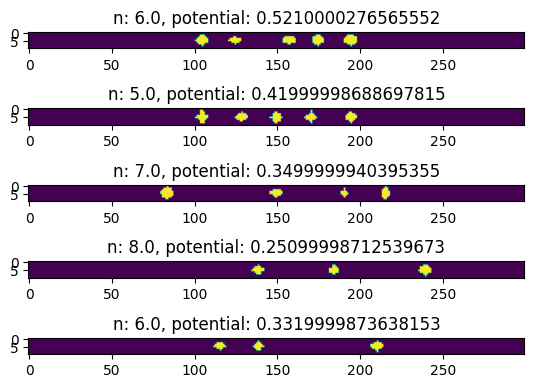

In [62]:
# sample된 이미지 출력
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.imshow(x[i])
    plt.title("n: {}, potential: {}".format(y[i][0], y[i][1]))

## 압축을 풀지 않고 이미지 파일을 읽는 코드
1. BytesIO 함수
2. OpenCV 의 imdecode 함수

- 이미지 업로드에서의 두 방식의 차이
 - 이미지 하나를 업로드하는 속도
 - 이미지를 로딩하는 방법의 차이

In [63]:
import time

def timer(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        computation_time = end_time - start_time
        print(f"Execution time of {func.__name__}: {computation_time} seconds")
        return result
    return wrapper

In [12]:
!pip install opencv-python

In [120]:
from io import BytesIO
from PIL import Image # Bytes 로 압축된 이미지를 이미지로 변환하기 위해 필요
from zipfile import ZipFile # 압축된 데이터 파일 핸들링을 위한 라이브러리

In [121]:
from cv2 import imdecode # opencv 미설치시 !pip install opencv-python 명령문으로 설치

### 1. io.BytesIO()
- 방법: 객체 내에 저장된 bytes 정보를 불러와 이미지로 읽는다.
 - 다양한 I/O(입출력) 형태 중에 바이너리 I/O(buffered I/O) 형태를 기대하고 처리한다.  
 - 모든 종류의 텍스트가 아닌 데이터에 사용할 수 있으며, 텍스트 데이터 처리를 수동으로 제어해야 할 때도 사용할 수 있다.
- imdecode 함수보다 속도가 느리다.

In [118]:
@timer
def extract_img_zipfile(zip_path, img_name):
    """
    zip_path: zip 파일 경로 ex) './train.zip'
    img_name: zip 파일 내 이미지 파일 이름 ex) 'train/image_0.png' or ['train/image_0.png', 'train/image_1.png', ..]
    """
    with ZipFile(zip_path, 'r') as img_file:
        # zip_path 경로 내 img_name 데이터를 읽는 코드
        img_data = img_file.read(img_name)

    # io.BytesIO 로 Byte 객체 생성
    img_bytes_io = BytesIO(img_data)

    # 생성된 Byte 객체를 ndarray 로 변환하는 코드
    with Image.open(img_bytes_io) as img:
        return np.array(img)

Execution time of extract_img_zipfile: 1.3666057586669922 seconds


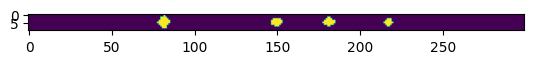

In [119]:
img_array = extract_img_zipfile('./3주차-PBL-data.zip', 'train/image_0.png')
plt.imshow(img_array)

### 2. OpenCV 의 imdecode
- imdecode(buf, flags)의 형태로 사용하며,  
buf 에는 인코딩된 배열이 입력되고, 그 결과로 디코딩된 배열이 출력된다.
- 속도가 상대적으로 우수하다.

In [ ]:
import cv2

In [116]:
@timer
def extract_img_zipfile_opencv(zip_path, img_name):
    """
    zip_path: zip 파일 경로 ex) './train.zip'
    img_name: zip 파일 내 이미지 파일 이름 ex) 'train/image_0.png' or ['train/image_0.png', 'train/image_1.png', ..]
    """
    with ZipFile(zip_path, 'r') as img_file:
        # zip_path 경로 내 img_name 데이터를 읽는 코드
        img_data = img_file.read(img_name)

    # memory buffer 를 1D-ndarray 로 변환
    np_buffer = np.frombuffer(img_data, np.uint8)
    # buffer 를 gray scale image 인 2D-ndarray 로 변환
    img = imdecode(np_buffer, cv2.IMREAD_GRAYSCALE)
    return img

Execution time of extract_img_zipfile_opencv: 0.7573947906494141 seconds


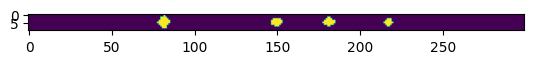

In [117]:
img_array = extract_img_zipfile_opencv('./3주차-PBL-data.zip', 'train/image_0.png')
plt.imshow(img_array)

## 방법1을 이용하여 Dataloader 설계하기

In [70]:
zip_path = './3주차-PBL-data.zip'
pkl_name = ['train.pkl', 'valid.pkl']

In [103]:
@timer
def extract_pkl_zipfile(zip_path, pkl_name, train=True):

    if train:
        with ZipFile(zip_path, 'r') as file_name:
            # zip_path 경로 내 file_name 데이터를 읽는 코드
            pkl_data = file_name.read(pkl_name[0])
        # io.BytesIO 로 Byte 객체 생성
        pkl_bytes_io = BytesIO(pkl_data)
        data = pickle.load(pkl_bytes_io)

    else:
        with ZipFile(zip_path, 'r') as file_name:
            # zip_path 경로 내 file_name 데이터를 읽는 코드
            pkl_data = file_name.read(pkl_name[1])
        # io.BytesIO 로 Byte 객체 생성
        pkl_bytes_io = BytesIO(pkl_data)
        data = pickle.load(pkl_bytes_io)

    return data

In [104]:
extract_pkl_zipfile(zip_path, pkl_name, train=False) # 앞에서와 같은 결과

Execution time of extract_pkl_zipfile: 1.0911402702331543 seconds


,n,potential,position,img_path
0,6,0.457,"[100, 122, 140, 159, 177, 199]",valid/image_0.png
1,7,0.291,"[74, 102, 127, 150, 172, 197, 225]",valid/image_1.png
2,6,0.434,"[98, 121, 140, 159, 178, 201]",valid/image_2.png
3,8,0.435,"[86, 107, 125, 141, 158, 174, 192, 213]",valid/image_3.png
4,8,0.401,"[83, 105, 124, 141, 158, 175, 194, 216]",valid/image_4.png
...,...,...,...,...
9995,6,0.301,"[84, 113, 137, 162, 186, 215]",valid/image_9995.png
9996,8,0.345,"[76, 100, 121, 140, 159, 178, 199, 223]",valid/image_9996.png
9997,5,0.372,"[100, 126, 150, 173, 199]",valid/image_9997.png
9998,6,0.304,"[84, 113, 138, 161, 186, 215]",valid/image_9998.png


In [98]:
class custom_PBL_train_dataset_1(torch.utils.data.Dataset):
    def __init__(self, data_dir, train=True, transform=None):

        self.data_dir = data_dir

        if train:
            self.data = extract_pkl_zipfile(zip_path, pkl_name, train=True)
            self.input_path = self.data['img_path'].values
            self.target = self.data[['n', 'potential']].values # 그 자체로 target
        else:
            self.data = extract_pkl_zipfile(zip_path, pkl_name, train=False)
            self.input_path = self.data['img_path'].values
            self.target = self.data[['n', 'potential']].values

        if transform is None:
            self.transform = torch.Tensor
        else:
            self.transform = transform

    def __len__(self):
        return len(self.target)

    def __getitem__(self, index):

        input_file = Image.open(self.data_dir + self.input_path[index])
        self.input = np.array(input_file) # idx2numpy 대신 np.array로 array 변환

        img = self.transform(self.input)
        label = self.transform(self.target[index])

        return img, label

In [99]:
custom_train_data_1 = custom_PBL_train_dataset_1(data_dir, train=True)
custom_test_data_1 = custom_PBL_train_dataset_1(data_dir, train=False)

train_loader_1 = DataLoader(dataset=custom_train_data_1, batch_size=16, shuffle=True)
test_loader_1 = DataLoader(dataset=custom_test_data_1, batch_size=16, shuffle=False)

In [100]:
x, y = next(iter(train_loader_1))

In [101]:
x.shape

torch.Size([16, 10, 300])

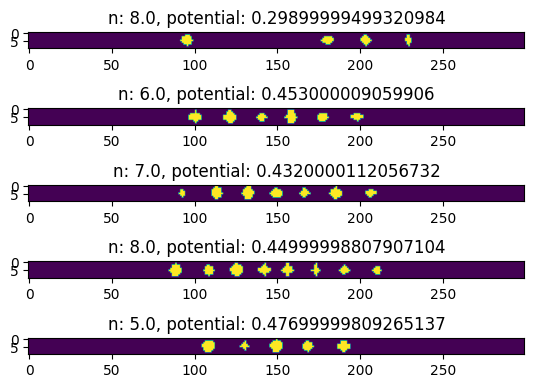

In [102]:
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.imshow(x[i])
    plt.title("n: {}, potential: {}".format(y[i][0], y[i][1]))